In [1]:
%load_ext autoreload
%load_ext autotime

time: 247 µs (started: 2024-03-14 08:33:48 -07:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))

time: 957 ms (started: 2024-03-14 08:33:48 -07:00)


In [3]:
import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
print('pandas', pd.__version__)
print('dask', dask.__version__)
print('numpy', np.__version__)

pandas 2.1.2
dask 2023.9.3
numpy 1.24.3
time: 1.4 s (started: 2024-03-14 08:33:49 -07:00)


In [4]:
trace_path = '/usr/workspace/iopp/wisio_logs/recorder_hacc_32_0/_parquet'

time: 695 µs (started: 2024-03-14 08:33:51 -07:00)


In [5]:
%autoreload 2

from wisio.cluster_management import load_cluster_config
from wisio.recorder import RecorderAnalyzer

cluster_config = load_cluster_config('cluster_config_local.yml')
cluster_config.local_dir = '/var/tmp/wisio-recorder-hacc'

analyzer = RecorderAnalyzer(
    checkpoint=False,
    checkpoint_dir='/usr/workspace/iopp/wisio_logs/_checkpoints/recorder_hacc_32_0',
    cluster_config=cluster_config,
    working_dir='.recorder/hacc',
    debug=False,
)

analyzer.cluster_manager.client.dashboard_link

[INFO] [08:33:54] Initializing Recorder analyzer [/g/g91/izzet/projects/wisio/wisio/analyzer.py:110]


'http://127.0.0.1:8787/status'

time: 4.72 s (started: 2024-03-14 08:33:52 -07:00)


In [6]:
# analyzer.cluster_manager.client.restart()

result = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['iops'],
    # view_types=['proc_name'],
    # slope_threshold=15,
)

[INFO] [08:34:00] Read traces (0.3184723239974119) [/g/g91/izzet/projects/wisio/wisio/recorder.py:78]
[INFO] [08:34:03] Compute high-level metrics (2.689287699991837) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:150]
[INFO] [08:34:04] Compute main view (1.5094421110115945) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:165]
[INFO] [08:34:04] Compute metric boundaries (0.06206458999076858) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:182]
[INFO] [08:34:08] Compute perspectives (3.8419898099964485) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:203]
[INFO] [08:34:09] Detect I/O bottlenecks (1.00782406097278) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:213]
[INFO] [08:34:18] Attach reasons to I/O bottlenecks (8.245230489003006) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:228]


time: 18 s (started: 2024-03-14 08:34:00 -07:00)


In [7]:
df = dd.read_parquet(trace_path).compute()
df

,index,proc,rank,thread_id,cat,io_cat,tstart,tend,func_id,level,...,app,proc_name,file_name,size,acc_pat,bandwidth,duration,tmid,file_id,proc_id
0,1,1,0,312784,2,0,0.968866,0.968892,MPI_Comm_size,0,...,app1,UNKNOWN,UNKNOWN,0,0,0.0,2.590000e-05,9688790,0,0
1,2,1,0,312784,2,0,0.968923,0.968924,MPI_Comm_rank,0,...,app1,UNKNOWN,UNKNOWN,0,0,0.0,1.000000e-06,9689235,0,0
2,3,1,0,312784,4,0,1.127011,1.127014,_ZN15RestartIO_GLEANC1Ev,0,...,app1,UNKNOWN,UNKNOWN,0,0,0.0,2.900000e-06,11270123,0,0
3,4,1,0,312784,2,0,1.127036,4.299232,MPI_Comm_dup,0,...,app1,UNKNOWN,UNKNOWN,0,0,0.0,3.172197e+00,27131343,0,0
4,5,1,0,312784,0,3,4.298360,4.298391,open,1,...,app1,app1#localhost#0#35184372401616,/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-c...,0,0,0.0,3.100000e-05,42983753,3341432783455051907,-929352282003159596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162582,162583,1,1279,312784,2,0,21.883120,21.885489,MPI_Comm_free,0,...,app1,UNKNOWN,UNKNOWN,0,0,0.0,2.368000e-03,218843037,0,0
162583,162584,1,1279,312784,4,0,21.883120,21.885492,_ZN15RestartIO_GLEAN19__destroyPartitionsEv,0,...,app1,UNKNOWN,UNKNOWN,0,0,0.0,2.372000e-03,218843057,0,0
162584,162585,1,1279,312784,2,0,21.885509,21.887373,MPI_Comm_free,0,...,app1,UNKNOWN,UNKNOWN,0,0,0.0,1.865000e-03,218864413,0,0
162585,162586,1,1279,312784,4,0,21.885509,21.887377,_ZN15RestartIO_GLEAN8FinalizeEv,0,...,app1,UNKNOWN,UNKNOWN,0,0,0.0,1.868900e-03,218864432,0,0


time: 318 ms (started: 2024-03-14 08:34:58 -07:00)


In [9]:
df[df['func_id'].str.contains('read')]['size'].value_counts()

size
67108864     8960
25165824     1280
134217728    1280
33554432     1280
Name: count, dtype: int64

time: 42.5 ms (started: 2024-03-14 08:35:57 -07:00)


In [14]:
result.main_view[result.main_view['read_count'] > 0].compute()

time  \
file_name                                          proc_name                          time_range             
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000000-o... app1#localhost#0#35184372401616    30          0.301169   
                                                                                      31          0.453507   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000001-o... app1#localhost#1#35184372401616    30          0.051062   
                                                                                      31          0.537649   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000002-o... app1#localhost#2#35184372401616    30          0.052511   
...                                                                                                    ...   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001278-o... app1#localhost#1278#35184372401616 14          0.668572   
                                                                                      15          0.253388   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001279-o... app1#localhost#1279#35184372401616 9           0.007753   
                                                                                      13          0.865117   
                                                                                      14          0.043048   

                                                                                                  count  \
file_name                                          proc_name                          time_range          
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000000-o... app1#localhost#0#35184372401616    30             12   
                                                                                      31             11   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000001-o... app1#localhost#1#35184372401616    30              8   
                                                                                      31             15   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000002-o... app1#localhost#2#35184372401616    30              8   
...                                                                                                 ...   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001278-o... app1#localhost#1278#35184372401616 14             13   
                                                                                      15              5   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001279-o... app1#localhost#1279#35184372401616 9               4   
                                                                                      13             16   
                                                                                      14              3   

                                                                                                   size_min  \
file_name                                          proc_name                          time_range              
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000000-o... app1#localhost#0#35184372401616    30           50331648   
                                                                                      31          327155712   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000001-o... app1#localhost#1#35184372401616    30           50331648   
                                                                                      31          192937984   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000002-o... app1#localhost#2#35184372401616    30           50331648   
...                                                                                                     ...   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001278-o... app1#localhost#1278#35184372401616 14          184549376   
                                                                                      15          528482304   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001279-o... app1#localhost#1279#35184372401616 9            25165824   
                                                          

time: 78.3 ms (started: 2024-03-14 08:37:30 -07:00)


In [13]:
result.main_view[result.main_view['read_max'] > 0].compute()

time  \
file_name                                          proc_name                          time_range             
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000000-o... app1#localhost#0#35184372401616    30          0.301169   
                                                                                      31          0.453507   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000001-o... app1#localhost#1#35184372401616    30          0.051062   
                                                                                      31          0.537649   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000002-o... app1#localhost#2#35184372401616    30          0.052511   
...                                                                                                    ...   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001278-o... app1#localhost#1278#35184372401616 14          0.668572   
                                                                                      15          0.253388   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001279-o... app1#localhost#1279#35184372401616 9           0.007753   
                                                                                      13          0.865117   
                                                                                      14          0.043048   

                                                                                                  count  \
file_name                                          proc_name                          time_range          
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000000-o... app1#localhost#0#35184372401616    30             12   
                                                                                      31             11   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000001-o... app1#localhost#1#35184372401616    30              8   
                                                                                      31             15   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000002-o... app1#localhost#2#35184372401616    30              8   
...                                                                                                 ...   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001278-o... app1#localhost#1278#35184372401616 14             13   
                                                                                      15              5   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001279-o... app1#localhost#1279#35184372401616 9               4   
                                                                                      13             16   
                                                                                      14              3   

                                                                                                   size_min  \
file_name                                          proc_name                          time_range              
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000000-o... app1#localhost#0#35184372401616    30           50331648   
                                                                                      31          327155712   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000001-o... app1#localhost#1#35184372401616    30           50331648   
                                                                                      31          192937984   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000002-o... app1#localhost#2#35184372401616    30           50331648   
...                                                                                                     ...   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001278-o... app1#localhost#1278#35184372401616 14          184549376   
                                                                                      15          528482304   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001279-o... app1#localhost#1279#35184372401616 9            25165824   
                                                          

time: 91 ms (started: 2024-03-14 08:37:16 -07:00)


In [16]:
mv = result.main_view.compute()
mv

time  \
file_name                                          proc_name                          time_range             
/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-co... app1#localhost#0#35184372401616    5           0.000269   
                                                   app1#localhost#1#35184372401616    5           0.000167   
                                                   app1#localhost#10#35184372401616   5           0.000184   
                                                   app1#localhost#100#35184372401616  5           0.000230   
                                                   app1#localhost#1000#35184372401616 5           0.000188   
...                                                                                                    ...   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001279-o... app1#localhost#1279#35184372401616 7           0.007088   
                                                                                      9           0.007753   
                                                                                      11          0.000018   
                                                                                      13          0.865117   
                                                                                      14          0.043048   

                                                                                                  count  \
file_name                                          proc_name                          time_range          
/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-co... app1#localhost#0#35184372401616    5               5   
                                                   app1#localhost#1#35184372401616    5               5   
                                                   app1#localhost#10#35184372401616   5               5   
                                                   app1#localhost#100#35184372401616  5               5   
                                                   app1#localhost#1000#35184372401616 5               5   
...                                                                                                 ...   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001279-o... app1#localhost#1279#35184372401616 7               3   
                                                                                      9               4   
                                                                                      11              1   
                                                                                      13             16   
                                                                                      14              3   

                                                                                                   size_min  \
file_name                                          proc_name                          time_range              
/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-co... app1#localhost#0#35184372401616    5                   0   
                                                   app1#localhost#1#35184372401616    5                   0   
                                                   app1#localhost#10#35184372401616   5                   0   
                                                   app1#localhost#100#35184372401616  5                   0   
                                                   app1#localhost#1000#35184372401616 5                   0   
...                                                                                                     ...   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001279-o... app1#localhost#1279#35184372401616 7            25165824   
                                                                                      9            25165824   
                                                                                      11                  0   
                                                          

time: 88.4 ms (started: 2024-03-14 08:39:59 -07:00)


In [50]:
min_view = mv[mv['read_min'] > 0]
max_view = mv[mv['read_max'] > 0]


mv['read_max'].value_counts()

read_max
0            9323
134217728    1280
25165824      721
67108864      605
33554432       56
Name: count, dtype: int64

time: 10.1 ms (started: 2024-03-14 08:49:47 -07:00)


In [54]:
mv[mv['read_max'] > 0].groupby(['read_max'])['read_count'].sum()

read_max
25165824      721
33554432       56
67108864     2606
134217728    9417
Name: read_count, dtype: int64

time: 12 ms (started: 2024-03-14 08:51:45 -07:00)


In [48]:
mv['read_count'].value_counts()

read_count
0     9323
1      808
9      442
2      217
10     206
3      191
7      189
8      188
6      157
4      142
5      122
Name: count, dtype: int64

time: 4.56 ms (started: 2024-03-14 08:49:20 -07:00)


In [45]:
mv[mv['read_count'] > 0]['read_count'].sum()

12800

time: 8.37 ms (started: 2024-03-14 08:48:39 -07:00)


In [16]:
sv = result.evaluated_views['iops'][('time_range',)].scored_view
sv.head()

,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,write_size,...,stat_time,close_count,open_count,seek_count,stat_count,time_per,count_per,iops_slope,iops_bin,iops_score
time_range,,,,,,,,,,,,,,,,,,,,,
7,4.150739,286,0,763363328,2969567232,0.000000,0.142372,4.150739,0,1082130432,...,0.0,81,142,30,0,0.050366,0.003922,0.077864,8,critical
9,8.444255,677,0,25165824,956301312,0.012908,0.000000,8.444255,956301312,0,...,0.0,164,437,38,0,0.102464,0.009283,0.090599,8,critical
8,6.432803,1294,0,25165824,327155712,0.000000,0.127257,6.432803,0,327155712,...,0.0,500,608,13,0,0.078057,0.017744,0.227315,7,very high
10,8.795384,1791,0,788529152,245702328320,0.007292,1.057437,8.795384,50331648,49291460608,...,0.0,120,177,770,0,0.106725,0.024558,0.230109,7,very high
11,6.356201,1590,0,788529152,161715585024,0.000000,0.691500,6.356201,0,38117834752,...,0.0,208,194,631,0,0.077128,0.021802,0.282679,7,very high


time: 40.3 ms (started: 2024-02-19 20:13:15 -08:00)


In [18]:
from wisio.rules import * 

rule_dict = {rule: BottleneckRule(rule_key=rule, rule=KNOWN_RULES[rule], verbose=False)
                     for rule in KNOWN_RULES}

rule_dict

{'excessive_metadata_access': <wisio.rules.BottleneckRule at 0x155520a2a4f0>,
 'operation_imbalance': <wisio.rules.BottleneckRule at 0x155520a8f190>,
 'random_operations': <wisio.rules.BottleneckRule at 0x15548ec24a90>,
 'size_imbalance': <wisio.rules.BottleneckRule at 0x15548ec24cd0>,
 'small_reads': <wisio.rules.BottleneckRule at 0x15548ec24970>,
 'small_writes': <wisio.rules.BottleneckRule at 0x15548ec24e80>}

time: 3.13 ms (started: 2024-02-19 20:14:24 -08:00)


dict_values([<wisio.rules.BottleneckRule object at 0x155520a2a4f0>, <wisio.rules.BottleneckRule object at 0x155520a8f190>, <wisio.rules.BottleneckRule object at 0x15548ec24a90>, <wisio.rules.BottleneckRule object at 0x15548ec24cd0>, <wisio.rules.BottleneckRule object at 0x15548ec24970>, <wisio.rules.BottleneckRule object at 0x15548ec24e80>])


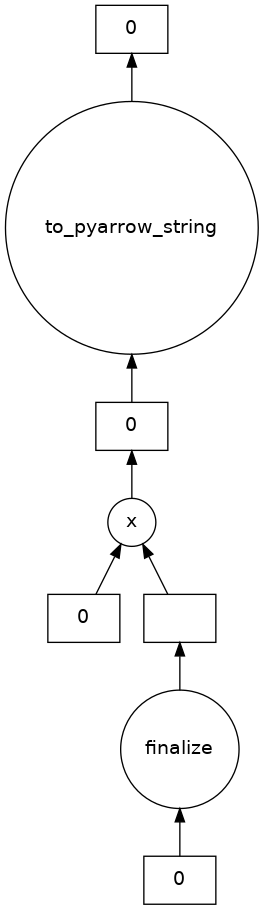

time: 212 ms (started: 2024-02-19 20:19:35 -08:00)


In [20]:
def x(df, rules, records_index):
    print(rules)
    return {'x': 'hello'}

scoring_result = result.evaluated_views['iops'][('time_range',)]

xy = scoring_result.scored_view.map_partitions(x, rules=rule_dict.values(), records_index=scoring_result.records_index)
xy.visualize()

In [7]:
result.output.console(show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             32.74 seconds                                                                             │
│  I/O Time             10.37 seconds                                                                             │
│                       ├── Read - 1.40 seconds (13.48%)                                                          │
│                       ├── Write - 2.98 seconds (28.74%)                                                         │
│                       └── Metadata - 8.80 seconds (84.85%)                                                      │
│  I/O Ops              72,928 ops                                                                                │
│                       ├── Read - 12,800 ops (17.55%)                                                            │
│                       ├── Write - 12,800 ops (17.55%)                                                           │
│                       └── Metadata - 47,328 ops (64.90%)                                                        │
│  I/O Size             1.54 TiB                                                                                  │
│                       ├── Read - 790.00 GiB (50.00%)                                                            │
│                       └── Write - 790.00 GiB (50.00%)                                                           │
│  Read Xfer            64 MiB->64 MiB - 2,662 ops                                                                │
│                       ├── 16-64 MiB - 1,382 ops (51.92%)                                                        │
│                       └── >64 MiB - 1,280 ops (48.08%)                                                          │
│  Write Xfer           64 MiB->64 MiB - 2,954 ops                                                                │
│                       ├── 16-64 MiB - 1,674 ops (56.67%)                                                        │
│                       └── >64 MiB - 1,280 ops (43.33%)                                                          │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 10.37 s (100.00%) - 790.00 GiB/790.00 GiB R/W (50.00/50.00%) - 72,928     │
│                           ops (100.00%)                                                                         │
│  App(s)               1 app(s)                                                                                  │
│                       └── app1 - 10.37 s (100.00%) - 790.00 GiB/790.00 GiB R/W (50.00/50.00%) - 72,928 ops      │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  1280 process(es)/rank(s)                                                                  │
│  Files                2561 files                                                                                │
│                       ├── Shared: 1 files (0.04%)                                                               │
│                       └── FPP: 2560 files (99.96%)                                                              │
│  Time Period(s)       28 time period(s) (Time granularity: 10000000.0)                                          │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           7.96                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  File view (552 bottlenecks)                          

time: 2.74 s (started: 2024-02-19 20:09:55 -08:00)


In [6]:
%autoreload 2

analyzer.cluster_manager.client.restart()

result = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['iops'],
    # view_types=['proc_name'],
    # slope_threshold=15,
)

[INFO] [10:48:24] Read traces (3.1768259429372847) [/g/g91/izzet/projects/wisio/wisio/recorder.py:70]
[INFO] [10:48:26] Compute high-level metrics (0.03683994011953473) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:132]
[INFO] [10:48:28] Compute main view (0.46697177714668214) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:146]
[INFO] [10:48:28] Compute metric boundaries (0.04855962400324643) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:161]
[INFO] [10:48:33] Compute perspectives (1.6465032529085875) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:185]
[INFO] [10:48:35] Detect I/O bottlenecks (0.7976382588967681) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:198]


process_bottlenecks len 90
process_bottlenecks t1 5.98139464086853
handle_task_results t1 0.011040866142138839
handle_task_results t2 0.021610700991004705
handle_task_results t1 0.011471997946500778
handle_task_results t2 0.02209293283522129
handle_task_results t3 0.04573960299603641 3
handle_task_results t3 0.062202348140999675 9
handle_task_results t1 0.004968054825440049
handle_task_results t2 0.014053901890292764
handle_task_results t3 0.03660427685827017 5
handle_task_results t1 0.02016329299658537
handle_task_results t2 0.028943208046257496
handle_task_results t3 0.073051692917943 8
handle_task_results t1 0.00812302203848958
handle_task_results t2 0.02336796000599861
handle_task_results t1 0.039447071962058544
handle_task_results t2 0.04503416107036173
handle_task_results t3 0.04126757103949785 4
handle_task_results t3 0.06329249404370785 3
handle_task_results t1 0.009030795888975263
handle_task_results t2 0.017432959051802754
handle_task_results t1 0.010475313058122993
handle_ta

[INFO] [10:49:01] Attach reasons to I/O bottlenecks (23.27988518611528) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:211]


time: 42.9 s (started: 2024-02-02 10:48:18 -08:00)


In [8]:
characteristics = result.characteristics
evaluated_views = result.evaluated_views
metric_boundaries = result.metric_boundaries

time: 740 µs (started: 2024-02-02 17:21:42 -08:00)


In [ ]:
from dask import compute, delayed, visualize
from wisio.rules import *
from wisio.types import view_name

characteristics = result.characteristics
evaluated_views = result.evaluated_views
metric_boundaries = result.metric_boundaries

rule_dict = {rule: BottleneckRule(rule_key=rule, rule=KNOWN_RULES[rule], verbose=False)
             for rule in KNOWN_RULES}


t0 = time.perf_counter()

tasks = {}
t = 0
for rule, impl in rule_dict.items():
    tasks[rule] = tasks.get(rule, {})
    for metric in evaluated_views:
        tasks[rule][metric] = tasks[rule].get(metric, {})
        for view_key in evaluated_views[metric]:
            bottleneck_result = evaluated_views[metric][view_key]
            tasks[rule][metric][view_key] = delayed(impl.handle_task_results)(
                dask_key_name=f"bottlenecks-{rule}-{metric}-{view_name(view_key)}",
                metric=metric,
                view_key=view_key,
                characteristics=characteristics,
                result=impl.define_tasks(
                    metric,
                    metric_boundary=metric_boundaries[metric],
                    view_key=view_key,
                    scoring_result=bottleneck_result,
                    characteristics=characteristics,
                )
            )
            t = t + 1

print('process_bottlenecks len', t)
print('process_bottlenecks t1', time.perf_counter() - t0)

visualize(tasks, filename='bottlenecks')

In [73]:
import dask.bag as db
import dataclasses
import itertools as it
import json
from dask import compute, delayed, visualize
from typing import Tuple
from wisio.rules import *
from wisio.types import view_name
from wisio.utils.collection_utils import deepflatten

def _define_bottleneck_tasks(
    zipped: Tuple[str, str, ViewKey, ScoringResult],
    rules: Dict[str, BottleneckRule],
    characteristics: Dict[str, RuleResult],
    metric_boundaries: Dict[Metric, dd.core.Scalar],
):
    rule, metric, view_key, scoring_result = zipped
    rule_impl = rules[rule]
    return rule, metric, view_key, rule_impl.define_tasks(
        metric,
        metric_boundary=metric_boundaries[metric],
        view_key=view_key,
        scoring_result=scoring_result,
        characteristics=characteristics,
    )

def _handle_bottleneck_task_results(
    zipped: Tuple[str, str, ViewKey, tuple],
    rules: Dict[str, BottleneckRule],
    characteristics: Dict[str, RuleResult],
):
    # print(zipped)
    rule, metric, view_key, result = zipped
    rule_impl = rules[rule]
    # bottleneck = {}
    # bottleneck[rule] = {}
    # bottleneck[rule][metric] = {}
    # bottleneck[rule][metric][view_name(view_key)] = rule_impl.handle_task_results(
    #     metric=metric,
    #     view_key=view_key,
    #     result=result,
    #     characteristics=characteristics,
    # )
    bottlenecks = rule_impl.handle_task_results(
        metric=metric,
        view_key=view_key,
        result=result,
        characteristics=characteristics,
    )
    # bottleneck_list = dataclasses.asdict(bottleneck)
    # bottleneck_dict['rule'] = rule
    # bottleneck_dict['metric'] = rule
    # bottleneck_dict['view_name'] = view_name(view_key)
    # bottleneck[rule][metric][view_key] = {}
    return [dict(rule=rule, metric=metric, view_name=view_name(view_key), bottleneck=dataclasses.asdict(bot)) for bot in bottlenecks]

rule_dict = {rule: BottleneckRule(rule_key=rule, rule=KNOWN_RULES[rule], verbose=False)
             for rule in KNOWN_RULES}

metrics = list(evaluated_views.keys())

view_keys_per_metric = list(it.chain.from_iterable(
    evaluated_views[metric].keys() for metric in metrics))
evaluated_views_per_metric = list(it.chain.from_iterable(
    evaluated_views[metric].values() for metric in metrics))

rules_bag = db.from_sequence(
    np.repeat(list(rule_dict.keys()), len(view_keys_per_metric)))
metrics_bag = db.from_sequence(
    np.repeat(metrics, len(rule_dict) * len(view_keys_per_metric)))
view_keys_bag = db.from_sequence(
    list(it.chain.from_iterable(it.repeat(view_keys_per_metric, len(rule_dict)))))
evaluated_views_bag = db.from_sequence(
    list(it.chain.from_iterable(it.repeat(evaluated_views_per_metric, len(rule_dict)))))

# tasks = db.zip(rules_bag, metrics_bag, view_keys_bag, evaluated_views_bag) \
#     .map(_define_bottleneck_tasks,
#             rules=rule_dict,
#             characteristics=characteristics,
#             metric_boundaries=metric_boundaries) \
#     .map(compute, optimize_graph=True) \
#     .flatten() \
#     .compute()

tasks = db.zip(rules_bag, metrics_bag, view_keys_bag, evaluated_views_bag) \
    .map(_define_bottleneck_tasks,
            rules=rule_dict,
            characteristics=characteristics,
            metric_boundaries=metric_boundaries) \
    .map(compute) \
    .flatten() \
    .map(_handle_bottleneck_task_results, rules=rule_dict, characteristics=characteristics) \
    .flatten() \
    .persist() \
    .repartition(partition_size='10MB') \
    .map(json.dumps).to_textfiles("tmp/*.json")  

handle_task_results t1 0.0031734120566397905
handle_task_results t2 0.00603048806078732
handle_task_results t3 0.019488280871883035 9
handle_task_results t1 0.006113890092819929
handle_task_results t2 0.009230270981788635
handle_task_results t3 0.027583930175751448 14
handle_task_results t1 0.03185680299066007
handle_task_results t2 0.03535059094429016
handle_task_results t3 0.047908277017995715 8
handle_task_results t1 0.05398007505573332
handle_task_results t2 0.06406341190449893
handle_task_results t1 0.07858827686868608
handle_task_results t2 0.08803149103187025
handle_task_results t1 0.015230947872623801
handle_task_results t2 0.018896699883043766
handle_task_results t1 0.026789563009515405
handle_task_results t3 0.03870452707633376handle_task_results t2 0.0381184748839587
 15
handle_task_results t1 0.010458013974130154
handle_task_results t1 0.005804853048175573
handle_task_results t2 0.017645755084231496
handle_task_results t2 0.00984596204943955
handle_task_results t3 0.0341032

In [74]:
import dask_awkward as dak 
import dataclasses

bot_arr = dak.from_json('tmp/*.json')
bot_arr

dask.awkward<from-json-files, npartitions=7>

time: 22.4 ms (started: 2024-02-02 18:14:08 -08:00)


In [75]:
bot_arr.rule.compute()

<Array ['excessive_metadata_access', ...] type='5231 * string'>

time: 115 ms (started: 2024-02-02 18:14:09 -08:00)


In [16]:
bottlenecks, = compute(tasks, optimize_graph=False)

time: 2.31 s (started: 2024-02-02 11:23:29 -08:00)


In [8]:
result.output.console()

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             32.74 seconds                                                                             │
│  I/O Time             10.37 seconds                                                                             │
│                       ├── Read - 1.40 seconds (13.48%)                                                          │
│                       ├── Write - 2.98 seconds (28.74%)                                                         │
│                       └── Metadata - 8.80 seconds (84.85%)                                                      │
│  I/O Ops              72,928 ops                                                                                │
│                       ├── Read - 12,800 ops (17.55%)                                                            │
│                       ├── Write - 12,800 ops (17.55%)                                                           │
│                       └── Metadata - 47,328 ops (64.90%)                                                        │
│  I/O Size             1.54 TiB                                                                                  │
│                       ├── Read - 790.00 GiB (50.00%)                                                            │
│                       └── Write - 790.00 GiB (50.00%)                                                           │
│  Read Xfer            64 MiB->64 MiB - 2,662 ops                                                                │
│                       ├── 16-64 MiB - 1,382 ops (51.92%)                                                        │
│                       └── >64 MiB - 1,280 ops (48.08%)                                                          │
│  Write Xfer           64 MiB->64 MiB - 2,954 ops                                                                │
│                       ├── 16-64 MiB - 1,674 ops (56.67%)                                                        │
│                       └── >64 MiB - 1,280 ops (43.33%)                                                          │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 10.37 s (100.00%) - 790.00 GiB/790.00 GiB R/W (50.00/50.00%) - 72,928     │
│                           ops (100.00%)                                                                         │
│  App(s)               1 app(s)                                                                                  │
│                       └── app1 - 10.37 s (100.00%) - 790.00 GiB/790.00 GiB R/W (50.00/50.00%) - 72,928 ops      │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  1280 process(es)/rank(s)                                                                  │
│  Files                2561 files                                                                                │
│                       ├── Shared: 1 files (0.04%)                                                               │
│                       └── FPP: 2560 files (99.96%)                                                              │
│  Time Period(s)       28 time period(s) (Time granularity: 10000000.0)                                          │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           7.96                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  File view (552 bottlenecks)                          

time: 4.11 s (started: 2024-02-02 11:11:08 -08:00)


In [7]:
ar = result.evaluated_views['iops'][('file_name',)].attached_records
pt = result.evaluated_views['iops'][('file_name',)].potential_bottlenecks

pt.head()

,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,write_size,...,stat_time,close_count,open_count,seek_count,stat_count,time_per,count_per,iops_slope,iops_bin,iops_score
file_name,,,,,,,,,,,,,,,,,,,,,
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000085-of-00001280.data,10.367186,48,0,763363328,6744440832,1.259819,0.658486,8.448881,662700032,662700032,...,0.0,4,4,20,0,0.001740,0.000658,2.643053,6,high
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000082-of-00001280.data,10.321506,48,0,788529152,6744440832,1.202998,0.676019,8.442489,662700032,662700032,...,0.0,4,4,20,0,0.001732,0.000658,2.631407,6,high
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000093-of-00001280.data,10.317016,48,0,763363328,6744440832,1.243649,0.629435,8.443932,662700032,662700032,...,0.0,4,4,20,0,0.001731,0.000658,2.630262,6,high
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000088-of-00001280.data,10.296164,48,0,788529152,6744440832,1.121111,0.721248,8.453805,662700032,662700032,...,0.0,4,4,20,0,0.001728,0.000658,2.624946,6,high
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000119-of-00001280.data,10.259217,48,0,788529152,6744440832,1.134101,0.684775,8.440340,662700032,662700032,...,0.0,4,4,20,0,0.001721,0.000658,2.615526,6,high


time: 71.2 ms (started: 2024-02-02 10:52:00 -08:00)


In [10]:
ptc = pt.compute()
ptc

,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,write_size,...,stat_time,close_count,open_count,seek_count,stat_count,time_per,count_per,iops_slope,iops_bin,iops_score
file_name,,,,,,,,,,,,,,,,,,,,,
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000085-of-00001280.data,10.367186,48,0,763363328,6744440832,1.259819,0.658486,8.448881,662700032,662700032,...,0.0,4,4,20,0,0.001740,0.000658,2.643053,6,high
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000082-of-00001280.data,10.321506,48,0,788529152,6744440832,1.202998,0.676019,8.442489,662700032,662700032,...,0.0,4,4,20,0,0.001732,0.000658,2.631407,6,high
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000093-of-00001280.data,10.317016,48,0,763363328,6744440832,1.243649,0.629435,8.443932,662700032,662700032,...,0.0,4,4,20,0,0.001731,0.000658,2.630262,6,high
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000088-of-00001280.data,10.296164,48,0,788529152,6744440832,1.121111,0.721248,8.453805,662700032,662700032,...,0.0,4,4,20,0,0.001728,0.000658,2.624946,6,high
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000119-of-00001280.data,10.259217,48,0,788529152,6744440832,1.134101,0.684775,8.440340,662700032,662700032,...,0.0,4,4,20,0,0.001721,0.000658,2.615526,6,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000228-of-00001280.data,3.937190,48,0,788529152,6744440832,0.387585,1.583462,1.966142,662700032,662700032,...,0.0,4,4,20,0,0.000661,0.000658,1.003763,4,low
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001005-of-00001280.data,3.934602,48,0,788529152,6744440832,0.255742,0.577760,3.101100,662700032,662700032,...,0.0,4,4,20,0,0.000660,0.000658,1.003103,4,low
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000205-of-00001280.data,3.932933,48,0,788529152,6744440832,0.366404,1.620498,1.946031,662700032,662700032,...,0.0,4,4,20,0,0.000660,0.000658,1.002678,4,low


time: 53.5 ms (started: 2024-02-02 10:52:36 -08:00)


In [28]:
for ix, row in ptc.iterrows():
    _ = dict(row)

time: 229 ms (started: 2024-02-02 11:02:07 -08:00)


In [30]:
for row in ptc.itertuples():
    print(row.Index)
    _ = row._asdict()

/p/gpfs1/iopp/temp/hacc_dir/test-Part00000085-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000082-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000093-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000088-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000119-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000107-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000112-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000095-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000090-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000080-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000118-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000182-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000092-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000407-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000180-of-00001280.data
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000087-of-000012

In [31]:
mv = result.main_view
mv

,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,write_size,metadata_size,read_count,write_count,metadata_count,read_min,read_max,write_min,write_max,metadata_min,metadata_max,data_count,data_size,data_time,sequential_time,random_time,sequential_size,random_size,sequential_count,random_count,close_time,open_time,seek_time,stat_time,close_count,open_count,seek_count,stat_count,id
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


time: 58 ms (started: 2024-02-02 11:05:57 -08:00)


In [32]:
mv.reset_index().groupby(['proc_name'])['file_name'].nunique().compute()

proc_name
app1#localhost#0#35184372401616       3
app1#localhost#1#35184372401616       3
app1#localhost#10#35184372401616      3
app1#localhost#100#35184372401616     3
app1#localhost#1000#35184372401616    3
                                     ..
app1#localhost#995#35184372401616     3
app1#localhost#996#35184372401616     3
app1#localhost#997#35184372401616     3
app1#localhost#998#35184372401616     3
app1#localhost#999#35184372401616     3
Name: file_name, Length: 1280, dtype: int64

time: 1.17 s (started: 2024-02-02 11:05:57 -08:00)


In [33]:
pt.index._meta

Index([], dtype='string', name='file_name')

time: 4.81 ms (started: 2024-02-02 11:06:01 -08:00)


In [34]:
ar.index._meta

MultiIndex([], names=['file_name', 'proc_name', 'time_range'])

time: 9.35 ms (started: 2024-02-02 11:06:02 -08:00)


In [35]:
mv.memory_usage(deep=True).sum().compute()

3928174

time: 66.2 ms (started: 2024-02-02 11:06:03 -08:00)


In [36]:
mv.index.memory_usage(deep=True).compute()

284734

time: 29.2 ms (started: 2024-02-02 11:06:04 -08:00)


In [37]:
mvi = mv.index.compute()
mvi

MultiIndex([('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ...
            (    '/p/gpfs1/iopp/temp/hacc_dir/test-Part00001278-of-00001280.data', ...),
     

time: 36.2 ms (started: 2024-02-02 11:06:05 -08:00)


In [40]:
mv.index.compute().to_frame(False).groupby('proc_name')['file_name'].nunique().to_dict()

{'app1#localhost#0#35184372401616': 3,
 'app1#localhost#1#35184372401616': 3,
 'app1#localhost#10#35184372401616': 3,
 'app1#localhost#100#35184372401616': 3,
 'app1#localhost#1000#35184372401616': 3,
 'app1#localhost#1001#35184372401616': 3,
 'app1#localhost#1002#35184372401616': 3,
 'app1#localhost#1003#35184372401616': 3,
 'app1#localhost#1004#35184372401616': 3,
 'app1#localhost#1005#35184372401616': 3,
 'app1#localhost#1006#35184372401616': 3,
 'app1#localhost#1007#35184372401616': 3,
 'app1#localhost#1008#35184372401616': 3,
 'app1#localhost#1009#35184372401616': 3,
 'app1#localhost#101#35184372401616': 3,
 'app1#localhost#1010#35184372401616': 3,
 'app1#localhost#1011#35184372401616': 3,
 'app1#localhost#1012#35184372401616': 3,
 'app1#localhost#1013#35184372401616': 3,
 'app1#localhost#1014#35184372401616': 3,
 'app1#localhost#1015#35184372401616': 3,
 'app1#localhost#1016#35184372401616': 3,
 'app1#localhost#1017#35184372401616': 3,
 'app1#localhost#1018#35184372401616': 3,
 '

time: 89.8 ms (started: 2024-02-02 11:06:37 -08:00)


In [98]:
list(mvi.to_frame(False).columns)

['file_name', 'proc_name', 'time_range']

time: 4.09 ms (started: 2024-02-02 00:26:56 -08:00)


In [95]:
mvi.to_frame(False).groupby('proc_name')['file_name'].nunique()

proc_name
app1#localhost#0#35184372401616       3
app1#localhost#1#35184372401616       3
app1#localhost#10#35184372401616      3
app1#localhost#100#35184372401616     3
app1#localhost#1000#35184372401616    3
                                     ..
app1#localhost#995#35184372401616     3
app1#localhost#996#35184372401616     3
app1#localhost#997#35184372401616     3
app1#localhost#998#35184372401616     3
app1#localhost#999#35184372401616     3
Name: file_name, Length: 1280, dtype: int64

time: 8.1 ms (started: 2024-02-02 00:20:38 -08:00)


In [79]:
mvip = mv.index.persist()
mvip

Dask Index Structure:
npartitions=32
    object
       ...
     ...  
       ...
       ...
dtype: object
Dask Name: repartition-index, 1 graph layer

time: 15.1 ms (started: 2024-02-02 00:02:34 -08:00)


In [82]:
mvi.names

FrozenList(['file_name', 'proc_name', 'time_range'])

time: 2.74 ms (started: 2024-02-02 00:11:55 -08:00)


In [80]:
mvip.compute()

MultiIndex([('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ('/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-collshm-comm4-master0', ...),
            ...
            (    '/p/gpfs1/iopp/temp/hacc_dir/test-Part00001278-of-00001280.data', ...),
     

time: 50.9 ms (started: 2024-02-02 00:02:48 -08:00)


In [78]:
mvi.to_frame(False)

,file_name,proc_name,time_range
0,/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-c...,app1#localhost#0#35184372401616,5
1,/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-c...,app1#localhost#1#35184372401616,5
2,/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-c...,app1#localhost#10#35184372401616,5
3,/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-c...,app1#localhost#100#35184372401616,5
4,/dev/shm/job2154496201-35619-OMPI_COLL_IBM-0-c...,app1#localhost#1000#35184372401616,5
...,...,...,...
11980,/p/gpfs1/iopp/temp/hacc_dir/test-Part00001279-...,app1#localhost#1279#35184372401616,7
11981,/p/gpfs1/iopp/temp/hacc_dir/test-Part00001279-...,app1#localhost#1279#35184372401616,9
11982,/p/gpfs1/iopp/temp/hacc_dir/test-Part00001279-...,app1#localhost#1279#35184372401616,11
11983,/p/gpfs1/iopp/temp/hacc_dir/test-Part00001279-...,app1#localhost#1279#35184372401616,13


time: 9.62 ms (started: 2024-02-01 23:53:54 -08:00)


In [45]:
ar.join(pt, on='file_name', lsuffix='_detail').compute()

time_detail  \
file_name                                          proc_name                          time_range                
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000000-o... app1#localhost#0#35184372401616    13             3.855495   
                                                                                      15             0.000021   
                                                                                      19             0.372799   
                                                                                      20             1.287224   
                                                                                      21             0.213160   
...                                                                                                       ...   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001239-o... app1#localhost#1239#35184372401616 22             0.407315   
                                                                                      23             0.003039   
                                                                                      24             1.005390   
                                                                                      25             0.223879   
                                                                                      26             0.000026   

                                                                                                  count_detail  \
file_name                                          proc_name                          time_range                 
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000000-o... app1#localhost#0#35184372401616    13                     1   
                                                                                      15                     2   
                                                                                      19                    11   
                                                                                      20                     5   
                                                                                      21                     2   
...                                                                                                        ...   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001239-o... app1#localhost#1239#35184372401616 22                     6   
                                                                                      23                     3   
                                                                                      24                    15   
                                                                                      25                     8   
                                                                                      26                     1   

                                                                                                  size_min_detail  \
file_name                                          proc_name                          time_range                    
/p/gpfs1/iopp/temp/hacc_dir/test-Part00000000-o... app1#localhost#0#35184372401616    13                        0   
                                                                                      15                        0   
                                                                                      19                184549376   
                                                                                      20                494927872   
                                                                                      21                662700032   
...                                                                                                           ...   
/p/gpfs1/iopp/temp/hacc_dir/test-Part00001239-o... app1#localhost#1239#35184372401616 22                461373440   
                                                                                      23    

time: 564 ms (started: 2024-02-01 23:37:41 -08:00)


In [7]:
ed = [bot.extra_data
      for rule in result.bottlenecks
      for metric in result.bottlenecks[rule]
      # for view_key in [('file_name',), ('proc_name',), ('time_range',)] # result.bottlenecks[rule][metric]
      for view_key in result.bottlenecks[rule][metric]
      for bot in result.bottlenecks[rule][metric][view_key]]
len(ed)

477

time: 2.78 ms (started: 2024-01-28 20:52:05 -08:00)


In [7]:
results = {}

for slope_threshold in [15, 30, 45, 60, 75, 90]:
    results[slope_threshold] = analyzer.analyze_parquet(
        trace_path=trace_path,
        metrics=['time'],
        # view_types=['proc_name'],
        metric_threshold=0.9,
        slope_threshold=slope_threshold,
    )

results

[INFO] [21:11:14] Read traces (0.08661087998189032) [/g/g91/izzet/projects/wisio/wisio/recorder.py:71]
[INFO] [21:11:14] Compute high-level metrics (0.02579379896633327) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:133]
[INFO] [21:11:15] Compute main view (0.16936859185807407) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:146]
[INFO] [21:11:15] Compute metric boundaries (0.02712914999574423) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:161]
[INFO] [21:11:19] Compute perspectives (0.23223768407478929) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:185]
[INFO] [21:11:21] Detect I/O bottlenecks (0.3446360230445862) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:199]
[INFO] [21:11:30] Attach reasons to I/O bottlenecks (7.469058919930831) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:212]
[INFO] [21:11:30] Read traces (0.08890869608148932) [/g/g91/izzet/projects/wisio/wisio/recorder.py:71]
[INFO] [21:11:32] Compute high-level metrics (0.027207981096580625) [/g/g91/izzet/projects/wisio

{15: <wisio.analyzer_result.AnalysisResult at 0x1554862ca640>,
 30: <wisio.analyzer_result.AnalysisResult at 0x15546877bb20>,
 45: <wisio.analyzer_result.AnalysisResult at 0x15546a8ac7c0>,
 60: <wisio.analyzer_result.AnalysisResult at 0x1553e2df90a0>,
 75: <wisio.analyzer_result.AnalysisResult at 0x1553e1d4b730>,
 90: <wisio.analyzer_result.AnalysisResult at 0x1553df7903d0>}

time: 1min 42s (started: 2024-01-28 21:11:14 -08:00)


In [15]:
import itertools as it
from sklearn.metrics.pairwise import cosine_similarity


def flatten_bot(res):
    return [bot.extra_data
            for rule in res.bottlenecks
            for metric in res.bottlenecks[rule]
            # for view_key in [('file_name',), ('proc_name',), ('time_range',)] # result.bottlenecks[rule][metric]
            for view_key in res.bottlenecks[rule][metric]
            for bot in res.bottlenecks[rule][metric][view_key]]


def gen_bot_df(bot):

    bot_df = pd.DataFrame(bot).select_dtypes([np.number]).query('time_threshold >= 0.9')
    bot_df = bot_df.loc[:, (~bot_df.columns.str.startswith(
        'time_')) & (~bot_df.columns.str.startswith('count_'))]

    return bot_df


for st1, st2 in it.permutations([15, 30, 45, 60, 75], 2):

    res1 = results[st1]
    res2 = results[st2]

    bot1 = flatten_bot(res1)
    bot2 = flatten_bot(res2)

    bot_df1 = gen_bot_df(bot1)
    bot_df2 = gen_bot_df(bot2)

    bot_sample1 = bot_df1.sample(n=1).values

    bot_df2['cosine'] = cosine_similarity(bot_df2.values, bot_sample1)

    print(f'similarity between {st1} - {st2}:',  bot_df2['cosine'].mean())

similarity between 15 - 30: 0.998699538267834
similarity between 15 - 45: 0.9986645116989563
similarity between 15 - 60: 0.9986645116989563
similarity between 15 - 75: 0.9921933637144622
similarity between 30 - 15: 0.9981942555217131
similarity between 30 - 45: 0.9972979611481235
similarity between 30 - 60: 0.9977750437283922
similarity between 30 - 75: 0.9925159679406412
similarity between 45 - 15: 0.9986284252002837
similarity between 45 - 30: 0.9986320415014089
similarity between 45 - 60: 0.998398971667914
similarity between 45 - 75: 0.9922986399853551
similarity between 60 - 15: 0.9981942555217131
similarity between 60 - 30: 0.9977006775755788
similarity between 60 - 45: 0.9985610330851102
similarity between 60 - 75: 0.9922986399853551
similarity between 75 - 15: 0.989826439642154
similarity between 75 - 30: 0.9882218408030058
similarity between 75 - 45: 0.9882734661055823
similarity between 75 - 60: 0.9869680212622879
time: 312 ms (started: 2024-01-28 21:19:02 -08:00)


In [114]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

ss = StandardScaler()
ms = MinMaxScaler()
ns = Normalizer()
edt3 = pd.DataFrame(ss.fit_transform(edt2),columns = edt2.columns)
edt4 = pd.DataFrame(ms.fit_transform(edt2),columns = edt2.columns)
edt5 = pd.DataFrame(ns.fit_transform(edt2),columns = edt2.columns)

time: 9.59 ms (started: 2024-01-28 19:33:30 -08:00)


In [134]:
from sklearn.metrics.pairwise import cosine_similarity
# sample2 = edt2.iloc[0].values.reshape(1, -1) #.sample(n=1).values
sample2 = edt2.sample(n=1).values
edt2['cosine'] = cosine_similarity(edt2.values, sample2)
edt2['cosine'].mean()
# edt2

0.9300583903625494

time: 13.3 ms (started: 2024-01-28 19:35:26 -08:00)


In [130]:
# sample3 = edt3.iloc[0].values.reshape(1, -1)
sample3 = edt3.sample(n=1).values
edt3['cosine'] = cosine_similarity(edt3.values, sample3)
edt3['cosine'].mean()
# edt3

0.035153990922805134

time: 7.81 ms (started: 2024-01-28 19:35:17 -08:00)


In [139]:
# sample3 = edt3.iloc[0].values.reshape(1, -1)
sample4 = edt4.sample(n=1).values
edt4['cosine'] = cosine_similarity(edt4.values, sample4)
edt4['cosine'].mean()
# edt3

0.8572614686066558

time: 18.8 ms (started: 2024-01-28 19:36:15 -08:00)


In [135]:
# sample3 = edt3.iloc[0].values.reshape(1, -1)
sample5 = edt5.sample(n=1).values
edt5['cosine'] = cosine_similarity(edt5.values, sample5)
edt5['cosine'].mean()
# edt3

0.9096327429760819

time: 18.8 ms (started: 2024-01-28 19:35:56 -08:00)


In [29]:
len(edt3[edt3['cosine'] > 0.8])

54

time: 3.44 ms (started: 2024-01-28 19:21:23 -08:00)


In [8]:
import awkward as ak
import dask_awkward as dak
import jmespath
import numpy as np
import dataclasses
from wisio.types import view_name

bot_dict = [dict(rule=rule, metric=metric, view_name=view_name(view_key), **dataclasses.asdict(bot))
            for rule in result.bottlenecks
            for metric in result.bottlenecks[rule]
            for view_key in result.bottlenecks[rule][metric]
            for bot in result.bottlenecks[rule][metric][view_key]]

time: 35.6 ms (started: 2024-01-24 11:51:46 -08:00)


In [9]:
bot_dict

[{'rule': 'excessive_metadata_access',
  'metric': 'time',
  'view_name': 'file_name',
  'description': '1 process accesses 1 file (/p/gpfs1/iopp/temp/hacc_dir/test-Part00000085-of-00001280.data) within 7 time periods and has an I/O time of 10.37 seconds which is 100.00% of overall I/O time of the workload.',
  'detail_list': None,
  'extra_data': {'time': 10.367186348643713,
   'count': 48,
   'size_min': 0,
   'size_max': 763363328,
   'size': 6744440832,
   'read_time': 1.2598189869895577,
   'write_time': 0.6584860985167325,
   'metadata_time': 8.448881263137423,
   'read_size': 662700032,
   'write_size': 662700032,
   'metadata_size': 5419040768,
   'read_count': 10,
   'write_count': 10,
   'metadata_count': 28,
   'read_min': 58720256,
   'read_max': 201326592,
   'write_min': 125829120,
   'write_max': 226492416,
   'metadata_min': 704643072,
   'metadata_max': 1736441856,
   'data_count': 20,
   'data_size': 1325400064,
   'data_time': 1.9183050855062902,
   'sequential_time'

time: 155 ms (started: 2024-01-24 11:51:50 -08:00)


In [ ]:
bot_arr = ak.Array(bot_dict)

bot_df = ak.to_dataframe(
    ak.zip({
        'rule': bot_arr['rule'],
        'metric': bot_arr['metric'],
        'view_name': bot_arr['view_name'],
        'description': bot_arr['bottleneck', 'description'],
        'first_reason': bot_arr['bottleneck', 'reasons', 'description'],
        'time': bot_arr['bottleneck', 'extra_data', 'time'],
        'num_files': bot_arr['bottleneck', 'extra_data', 'num_files'],
        'num_processes': bot_arr['bottleneck', 'extra_data', 'num_processes'],
        'num_time_periods': bot_arr['bottleneck', 'extra_data', 'num_time_periods'],
        'time_score': bot_arr['bottleneck', 'extra_data', 'time_score'],
        'time_threshold': bot_arr['bottleneck', 'extra_data', 'time_threshold'],
    })
)

bot_grp = bot_df \
    .groupby(['time', 'num_files', 'num_processes', 'num_time_periods', 'time_score']) \
    .agg({
        'description': 'first',
        'first_reason': 'first',
        'rule': 'nunique',
        'metric': 'nunique',
        'view_name': 'nunique',
        'time_threshold': 'mean',
    }) \
    .reset_index()

bot_grp

In [10]:
bot_df = pd.DataFrame(bot_dict) \
    .drop(columns=['detail_list', 'extra_data', 'reasons']) \
    .join(pd.DataFrame([b['extra_data'] for b in bot_dict])) \
    .drop(columns=['files', 'processes', 'time_periods']) \
    .groupby(['time', 'num_files', 'num_processes', 'num_time_periods', 'time_score']) \
    .agg({
        'description': 'first',
        'id': 'first',
        'rule': 'nunique',
        'metric': 'nunique',
        'view_name': 'nunique',
        'time_threshold': 'first',
    }) \
    .reset_index()

bot_df

,time,num_files,num_processes,num_time_periods,time_score,description,id,rule,metric,view_name,time_threshold
0,9.331319,3,1,9,critical,1 process (app1#localhost#96#35184372401616) a...,3741877654372430083,1,1,1,0.9
1,9.345442,1,1,6,critical,1 process accesses 1 file (/p/gpfs1/iopp/temp/...,-352549692062530531,1,1,3,0.9
2,9.346104,3,1,7,critical,1 process (app1#localhost#435#35184372401616) ...,-2581001533801601495,1,1,1,0.9
3,9.388940,1,1,6,critical,1 process accesses 1 file (/p/gpfs1/iopp/temp/...,-8346625422784818748,1,1,3,0.9
4,9.389838,3,1,7,critical,1 process (app1#localhost#413#35184372401616) ...,8735742714593283770,1,1,1,0.9
5,9.421952,1,1,7,critical,1 process accesses 1 file (/p/gpfs1/iopp/temp/...,-9182897186011680937,1,1,3,0.9
6,9.422252,3,1,8,critical,1 process (app1#localhost#97#35184372401616) a...,8245961215464883857,1,1,1,0.9
7,9.429925,1,1,8,critical,1 process accesses 1 file (/p/gpfs1/iopp/temp/...,-4207819809269422369,1,1,3,0.9
8,9.430375,3,1,9,critical,1 process (app1#localhost#87#35184372401616) a...,-7848261985538484233,1,1,1,0.9
9,9.458877,1,1,6,critical,1 process accesses 1 file (/p/gpfs1/iopp/temp/...,-9092816959780090700,1,1,3,0.9


time: 32.4 ms (started: 2024-01-24 11:52:31 -08:00)


In [11]:
bot_df['id'].nunique()

39

time: 3.5 ms (started: 2024-01-24 11:52:43 -08:00)


In [39]:
bot_df.dtypes

time                float64
num_files             int64
num_processes         int64
num_time_periods      int64
time_score           object
description          object
id                    int64
rule                  int64
metric                int64
view_name             int64
time_threshold      float64
dtype: object

time: 4.06 ms (started: 2024-01-24 11:35:19 -08:00)


In [42]:
'{:,.6f}'.format(10.367186)

-5195525705188184549

time: 2.22 ms (started: 2024-01-24 11:38:43 -08:00)


In [54]:
x = '_'.join([
    f"{'{:,.6f}'.format(10.367186)}_",
    f"{0}_",
    f"{1}_",
])

x

'10.367186__0__1_'

time: 2.61 ms (started: 2024-01-24 11:43:36 -08:00)


In [36]:
bot_df['id2'] = (
    bot_df['time'].map('{:,.7f}'.format) + '_' +
    bot_df['num_files'].astype(str) + '_' +
    bot_df['num_processes'].astype(str) + '_' +
    bot_df['num_time_periods'].astype(str)
).map(hash)
# bot_df['id'] = bot_df['id'].map(hash)
bot_df

,time,num_files,num_processes,num_time_periods,time_score,description,id,rule,metric,view_name,time_threshold,id2
0,9.331319,3,1,9,critical,1 process (app1#localhost#96#35184372401616) a...,-5346821874314432213,1,1,1,0.9,-5346821874314432213
1,9.345442,1,1,6,critical,1 process accesses 1 file (/p/gpfs1/iopp/temp/...,5856126599858809721,1,1,3,0.9,5856126599858809721
2,9.346104,3,1,7,critical,1 process (app1#localhost#435#35184372401616) ...,-7036045362755972479,1,1,1,0.9,-7036045362755972479
3,9.388940,1,1,6,critical,1 process accesses 1 file (/p/gpfs1/iopp/temp/...,6766456175846263804,1,1,3,0.9,6766456175846263804
4,9.389838,3,1,7,critical,1 process (app1#localhost#413#35184372401616) ...,6737933270737915838,1,1,1,0.9,6737933270737915838
5,9.421952,1,1,7,critical,1 process accesses 1 file (/p/gpfs1/iopp/temp/...,-8302692929632045053,1,1,3,0.9,-8302692929632045053
6,9.422252,3,1,8,critical,1 process (app1#localhost#97#35184372401616) a...,-2374794835634646181,1,1,1,0.9,-2374794835634646181
7,9.429925,1,1,8,critical,1 process accesses 1 file (/p/gpfs1/iopp/temp/...,3813356176279657883,1,1,3,0.9,3813356176279657883
8,9.430375,3,1,9,critical,1 process (app1#localhost#87#35184372401616) a...,-7019167274653451735,1,1,1,0.9,-7019167274653451735
9,9.458877,1,1,6,critical,1 process accesses 1 file (/p/gpfs1/iopp/temp/...,-3253220868389600904,1,1,3,0.9,-3253220868389600904


time: 20.9 ms (started: 2024-01-24 11:32:14 -08:00)


In [256]:
import jmespath

jmespath.search('length([?metric==`time`].extra_data[?time_threshold==`0.9`])', bot_dict)

195

time: 4.16 ms (started: 2024-01-23 21:08:27 -08:00)


In [250]:
from jmespath import functions

# 1. Create a subclass of functions.Functions.
#    The function.Functions base class has logic
#    that introspects all of its methods and automatically
#    registers your custom functions in its function table.


class CustomFunctions(functions.Functions):

    # 2 and 3.  Create a function that starts with _func_
    # and decorate it with @signature which indicates its
    # expected types.
    # In this example, we're creating a jmespath function
    # called "unique_letters" that accepts a single argument
    # with an expected type "string".
    @functions.signature({'types': ['string']})
    def _func_asdict(self, s):
        # Given a string s, return a sorted
        # string of unique letters: 'ccbbadd' ->  'abcd'
        return dataclasses.asdict(s)
    
    @functions.signature({'types': ['array']})
    def _func_unique(self, s):
        # Given a string s, return a sorted
        # string of unique letters: 'ccbbadd' ->  'abcd'
        return len(list(set(s)))


options = jmespath.Options(custom_functions=CustomFunctions())

jmespath.search('unique([].rule)', bot_dict, options=options)

1

time: 4.46 ms (started: 2024-01-23 20:50:38 -08:00)


In [109]:
len(bot_arr[bot_arr['bottleneck', 'extra_data', 'time_threshold'] <= 0.9])

195

time: 3.41 ms (started: 2024-01-23 19:59:56 -08:00)


In [111]:
bot_grp['final_score'] = np.log10(bot_grp['rule'] * bot_grp['metric'] * bot_grp['view_name'] * bot_grp['time_threshold'])
bot_grp['final_value'] = np.log10(bot_grp['time'] * bot_grp['num_files'] * bot_grp['num_processes'] * bot_grp['num_time_periods'] * bot_grp['time_threshold'])
bot_grp.sort_values('final_score', ascending=False)

,time,num_files,num_processes,num_time_periods,time_score,description,first_reason,rule,metric,view_name,time_threshold,final_score,final_value
0,9.331319,3,1,9,critical,1 process (app1#localhost#96#35184372401616) a...,Overall 85.73% (8.00 seconds) of I/O time is s...,1,1,5,0.9,0.653213,2.355549
29,10.259302,3,1,8,critical,1 process (app1#localhost#107#35184372401616) ...,Overall 82.31% (8.44 seconds) of I/O time is s...,1,1,5,0.9,0.653213,2.345572
22,9.911043,3,1,7,critical,1 process (app1#localhost#90#35184372401616) a...,Overall 85.19% (8.44 seconds) of I/O time is s...,1,1,5,0.9,0.653213,2.272581
23,10.138955,1,1,7,critical,1 process accesses 1 file (/p/gpfs1/iopp/temp/...,Overall 83.26% (8.44 seconds) of I/O time is s...,1,1,5,0.9,0.653213,1.805334
24,10.139328,3,1,8,critical,1 process (app1#localhost#95#35184372401616) a...,Overall 83.26% (8.44 seconds) of I/O time is s...,1,1,5,0.9,0.653213,2.340463
25,10.211422,1,1,7,critical,1 process accesses 1 file (/p/gpfs1/iopp/temp/...,Overall 82.68% (8.44 seconds) of I/O time is s...,1,1,5,0.9,0.653213,1.808427
26,10.211686,3,1,8,critical,1 process (app1#localhost#112#35184372401616) ...,Overall 82.68% (8.44 seconds) of I/O time is s...,1,1,5,0.9,0.653213,2.343551
27,10.258714,1,1,7,critical,1 process accesses 1 file (/p/gpfs1/iopp/temp/...,Overall 82.31% (8.44 seconds) of I/O time is s...,1,1,5,0.9,0.653213,1.810433
28,10.259217,1,1,7,critical,1 process accesses 1 file (/p/gpfs1/iopp/temp/...,Overall 82.27% (8.44 seconds) of I/O time is s...,1,1,5,0.9,0.653213,1.810455
30,10.259438,3,1,8,critical,1 process (app1#localhost#119#35184372401616) ...,Overall 82.27% (8.44 seconds) of I/O time is s...,1,1,5,0.9,0.653213,2.345577


time: 24 ms (started: 2024-01-23 20:00:32 -08:00)


In [54]:
bot_grp.reset_index()['time_score'].value_counts()

time_score
critical    39
Name: count, dtype: int64

time: 4.93 ms (started: 2024-01-23 19:32:32 -08:00)


In [7]:
result.output.console(show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             32.74 seconds                                                                             │
│  I/O Time             10.37 seconds                                                                             │
│                       ├── Read - 1.40 seconds (13.48%)                                                          │
│                       ├── Write - 2.98 seconds (28.74%)                                                         │
│                       └── Metadata - 8.80 seconds (84.85%)                                                      │
│  I/O Ops              72,928 ops                                                                                │
│                       ├── Read - 12,800 ops (17.55%)                                                            │
│                       ├── Write - 12,800 ops (17.55%)                                                           │
│                       └── Metadata - 47,328 ops (64.90%)                                                        │
│  I/O Size             1.54 TiB                                                                                  │
│                       ├── Read - 790.00 GiB (50.00%)                                                            │
│                       └── Write - 790.00 GiB (50.00%)                                                           │
│  Read Xfer            64 MiB->64 MiB - 2,662 ops                                                                │
│                       ├── 16-64 MiB - 1,382 ops (51.92%)                                                        │
│                       └── >64 MiB - 1,280 ops (48.08%)                                                          │
│  Write Xfer           64 MiB->64 MiB - 2,954 ops                                                                │
│                       ├── 16-64 MiB - 1,674 ops (56.67%)                                                        │
│                       └── >64 MiB - 1,280 ops (43.33%)                                                          │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 10.37 s (100.00%) - 790.00 GiB/790.00 GiB R/W (50.00/50.00%) - 72,928     │
│                           ops (100.00%)                                                                         │
│  App(s)               1 app(s)                                                                                  │
│                       └── app1 - 10.37 s (100.00%) - 790.00 GiB/790.00 GiB R/W (50.00/50.00%) - 72,928 ops      │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  1280 process(es)/rank(s)                                                                  │
│  Files                2561 files                                                                                │
│                       ├── Shared: 1 files (0.04%)                                                               │
│                       └── FPP: 2560 files (99.96%)                                                              │
│  Time Period(s)       28 time period(s) (Time granularity: 10000000.0)                                          │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           7.96                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  size_imbalance (157 bottlenecks)                     

time: 24.1 s (started: 2023-12-23 23:10:23 -08:00)


In [11]:
result.output.csv(name='HACC', file_path='hacc.csv')

time_file_name_slope start {'number': 0, 'division': None}
time_file_name_slope progress {'number': 0, 'division': None}
time_file_name_slope end {'number': 0, 'division': None}
time_proc_name_slope start {'number': 0, 'division': None}
time_proc_name_slope progress {'number': 0, 'division': None}
time_proc_name_slope end {'number': 0, 'division': None}
time_time_range_slope start {'number': 0, 'division': None}
time_time_range_slope progress {'number': 0, 'division': None}
time_time_range_slope end {'number': 0, 'division': None}
time_file_name_proc_name_slope start {'number': 0, 'division': None}
time_file_name_proc_name_slope progress {'number': 0, 'division': None}
time_file_name_proc_name_slope end {'number': 0, 'division': None}
time_file_name_time_range_slope start {'number': 0, 'division': None}
time_file_name_time_range_slope progress {'number': 0, 'division': None}
time_file_name_time_range_slope end {'number': 0, 'division': None}
time_proc_name_file_name_slope start {'numbe

In [7]:
timings = analyzer.cluster_manager.client.get_events('timings')
timings

((1703148724.7488773,
  {'key': 'time_time_range_slope',
   'message': None,
   'partition': 0,
   'size': 11985,
   'time': 6624912.316209487,
   'type': 'start'}),
 (1703148724.752603,
  {'key': 'time_proc_name_slope',
   'message': None,
   'partition': 0,
   'size': 11985,
   'time': 6624912.317641606,
   'type': 'start'}),
 (1703148724.79268,
  {'key': 'time_file_name_slope',
   'message': None,
   'partition': 0,
   'size': 11985,
   'time': 6624912.357950971,
   'type': 'start'}),
 (1703148725.146488,
  {'key': 'time_file_name_slope',
   'message': 'set_bound_columns end',
   'partition': 0,
   'size': 3840,
   'time': 6624912.61317438,
   'type': 'progress'}),
 (1703148725.2318845,
  {'key': 'time_time_range_slope',
   'message': 'set_bound_columns end',
   'partition': 0,
   'size': 10744,
   'time': 6624912.787477533,
   'type': 'progress'}),
 (1703148725.2372472,
  {'key': 'time_proc_name_slope',
   'message': 'set_bound_columns end',
   'partition': 0,
   'size': 1280,
   '

time: 32.6 ms (started: 2023-12-21 00:52:29 -08:00)


In [8]:
import numpy as np

timings_dict = {}
for _, timing in timings:
    timing_key = timing['key']
    timings_dict[timing_key] = timings_dict.get(timing_key, {})
    timings_dict[timing_key]['input_size'] = timings_dict[timing_key].get(
        'input_size', 0)
    timings_dict[timing_key]['output_size'] = timings_dict[timing_key].get(
        'output_size', 0)
    timings_dict[timing_key]['start'] = timings_dict[timing_key].get(
        'start', np.inf)
    timings_dict[timing_key]['end'] = timings_dict[timing_key].get(
        'end', -np.inf)
    if timing['type'] == 'start':
        timings_dict[timing_key]['input_size'] = timings_dict[timing_key]['input_size'] + timing['size']
        timings_dict[timing_key]['start'] = min(
            timings_dict[timing_key]['start'], timing['time'])
    elif timing['type'] == 'end':
        timings_dict[timing_key]['output_size'] = timings_dict[timing_key]['output_size'] + timing['size']
        timings_dict[timing_key]['end'] = max(
            timings_dict[timing_key]['end'], timing['time'])
    else:
        # progress
        pass

for timing_key in timings_dict:
    timings_dict[timing_key]['elapsed'] = timings_dict[timing_key]['end'] - \
        timings_dict[timing_key]['start']

timings_dict

{'time_time_range_slope': {'input_size': 23970,
  'output_size': 56,
  'start': 6624912.316209487,
  'end': 6624918.515102339,
  'elapsed': 6.198892852291465},
 'time_proc_name_slope': {'input_size': 23970,
  'output_size': 2560,
  'start': 6624912.317641606,
  'end': 6624918.294849437,
  'elapsed': 5.97720783110708},
 'time_file_name_slope': {'input_size': 23970,
  'output_size': 5122,
  'start': 6624912.357950971,
  'end': 6624918.880199979,
  'elapsed': 6.522249007597566},
 'time_proc_name_time_range_slope': {'input_size': 8590,
  'output_size': 56,
  'start': 6624912.924312419,
  'end': 6624918.729270998,
  'elapsed': 5.804958579130471},
 'time_proc_name_file_name_slope': {'input_size': 8590,
  'output_size': 1934,
  'start': 6624912.925463183,
  'end': 6624918.546659917,
  'elapsed': 5.621196733787656},
 'time_file_name_time_range_slope': {'input_size': 9590,
  'output_size': 54,
  'start': 6624913.224860825,
  'end': 6624918.432421437,
  'elapsed': 5.207560612820089},
 'time_file

time: 8.16 ms (started: 2023-12-21 00:52:37 -08:00)


In [9]:
import pandas as pd 

timings_df = pd.DataFrame.from_dict(timings_dict, orient='index')
timings_df

,input_size,output_size,start,end,elapsed
time_time_range_slope,23970,56,6.624912e+06,6.624919e+06,6.198893
time_proc_name_slope,23970,2560,6.624912e+06,6.624918e+06,5.977208
time_file_name_slope,23970,5122,6.624912e+06,6.624919e+06,6.522249
time_proc_name_time_range_slope,8590,56,6.624913e+06,6.624919e+06,5.804959
time_proc_name_file_name_slope,8590,1934,6.624913e+06,6.624919e+06,5.621197
time_file_name_time_range_slope,9590,54,6.624913e+06,6.624918e+06,5.207561
time_file_name_proc_name_slope,9590,1338,6.624913e+06,6.624918e+06,4.298301
time_time_range_file_name_slope,9326,2720,6.624913e+06,6.624919e+06,5.610269
time_time_range_proc_name_slope,9326,2560,6.624914e+06,6.624919e+06,5.149514
time_file_name_proc_name_time_range_slope,4192,50,6.624914e+06,6.624919e+06,4.757931


time: 14 ms (started: 2023-12-21 00:52:46 -08:00)


In [10]:
timings_df.to_csv('timings_hacc.csv')

time: 6.16 ms (started: 2023-12-21 00:52:52 -08:00)


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x155520a90d30>)

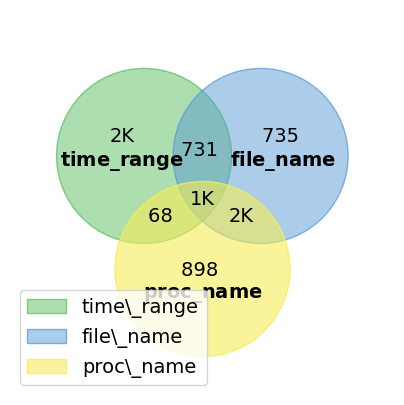

time: 609 ms (started: 2023-12-17 23:35:00 -08:00)


In [8]:
result.plots.view_relations3(
    metric='time',
    view_key1=('time_range',),
    view_key2=('file_name',),
    view_key3=('proc_name',),
)

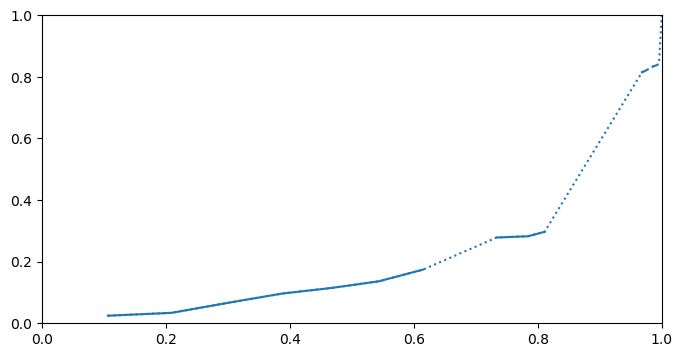

time: 341 ms (started: 2023-12-17 23:35:02 -08:00)


In [9]:
fig, ax = result.plots.slope(
    metric='time',
    view_keys=[('time_range',)],  # , ('file_name',), ('proc_name',)],
    figsize=(8, 4),
)